# Sharpening & Smoothing 

The purpose of sharpening filter is just the opposite of smoothing filter, its main focus is on the removal of blurring and highlight the edges it is based on the first and second order derivative.
Smoothing and sharpening function uses the pixels in an N X N neighborhood about each pixel to modify an image. For both smoothing and sharpening filter the larger the N X N the stronger the smoothing and sharpening effect.

Smoothing: is employed to remove high spatial frequency noise from a digital image.

Sharpening: is used to enhance the edge of the object and edges the contrast and the shade characteristics.

AIM:To Perform image smoothing & sharpening

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings

# Sharpening using Laplacian Operator

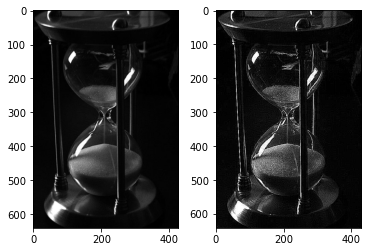

In [4]:
img = cv2.imread('hour.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
LaplacianF=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img3=cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_CONSTANT,0)
Sharpe_img=cv2.filter2D(img3,-1,LaplacianF)
plt.subplot(1,2,2)
plt.imshow(Sharpe_img,cmap='gray');

# Sharpening using Unsharp Masking

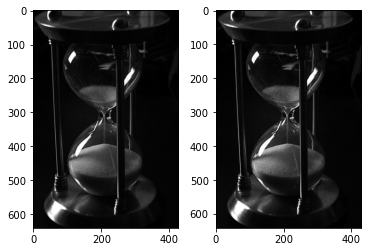

In [7]:
img = cv2.imread('hour.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
AveragingF=(1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]])
img3=cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_CONSTANT,0)
Blured_img=cv2.filter2D(img3,-1,AveragingF)
Mask_img=cv2.subtract(img3,Blured_img)
Sharpe_img1=cv2.add(img3,Mask_img)
plt.subplot(1,2,2)
plt.imshow(Sharpe_img1,cmap='gray');

# Smoothning

.

# Smoothing using Averaging Filter

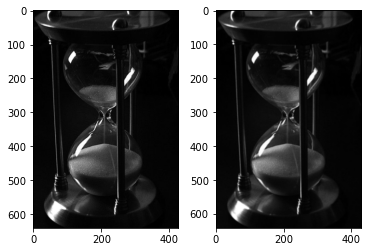

In [9]:
img = cv2.imread('hour.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
AveragingF=(1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]])
img3=cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_CONSTANT,0)
Smoothened_img=cv2.filter2D(img3,-1,AveragingF)
plt.subplot(1,2,2)
plt.imshow(Smoothened_img,cmap='gray');

# Smoothing using Median Filter

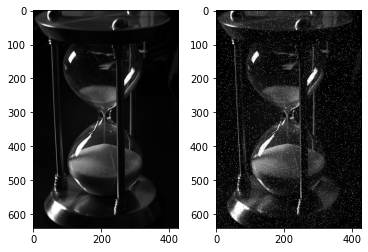

In [13]:
warnings.filterwarnings("ignore")
img = cv2.imread('hour.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
def noisy(image):
    r,c= img2.shape
    mean=50
    var=1
    sigma=var**0.5
    snp=0.5
    amount=0.04
    noisy=np.copy(img2)
    
    salt=np.ceil(amount*img2.size*snp)
    coords=[np.random.randint(0,i-1,int(salt)) for i in img2.shape]
    noisy[coords]=255
    
    pepper=np.ceil(amount*img2.size*(1-snp))
    coords=[np.random.randint(0,i-1,int(pepper)) for i in img2.shape]
    noisy[coords]=0
    return noisy

SaltnPepper=noisy(img2)
plt.subplot(1,2,2)
plt.imshow(SaltnPepper,cmap='gray');

# Removing SaltnPepper noise from above Image

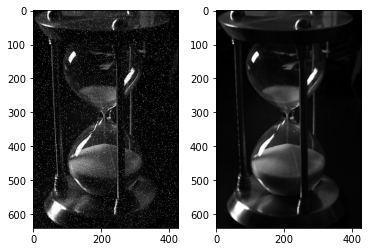

In [15]:
plt.subplot(1,2,1)
plt.imshow(SaltnPepper,cmap='gray')
MedianF=cv2.medianBlur(SaltnPepper,5)
plt.subplot(1,2,2)
plt.imshow(MedianF,cmap='gray');